# Lab 4

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

## Problem 1

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = np.array(hf.get('data'))

In [5]:
data[:,0] #Time (gps seconds), solar phase (deg), Earth longitude (deg),
          #gamma-ray counts
    

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [6]:
time = data[0,:]
solarPhase = data[1,:]
earthLong = data[2,:]
gammCount = data[3,:]

### Part 1

Here, we will plot a 2D histogram of gamma-ray counts vs solar phase.

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


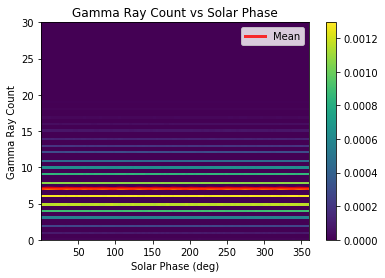

In [7]:
#plot 2D histogram

fig, ax = plt.subplots(1, 1)

h = ax.hist2d(solarPhase, gammCount, bins=100, density=True);
#ax.set_aspect('equal', 'box')

bins = np.linspace(solarPhase.min(), solarPhase.max(), 100)
delta = bins[1]-bins[0]
idx = np.digitize(solarPhase,bins)
mean = [np.mean(gammCount[idx==k]) for k in range(100)]

ax.plot(bins-delta/2, mean, 'r-', lw=3, alpha=.8, label='Mean')
ax.axis('tight')
plt.title('Gamma Ray Count vs Solar Phase')
plt.xlabel('Solar Phase (deg)')
plt.ylabel('Gamma Ray Count')
plt.legend()
plt.colorbar(h[3], ax=ax)

The background signal of gamma-ray counts vs solar phase stays constant at all phases. We can see from the 2D histogram above, the color of each bar representing gamma-ray count stays consistant across all degrees of solar phases. The red line, representing the mean of gamma-ray counts at each solar phase, stays flat across the plot. From observing how flat and consistant the plot is, we can say that the background stays the same across the dataset.

Now we will plot a 2D histogram of gamma-ray counts vs earth's longitude 

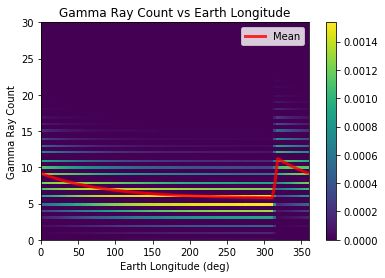

In [8]:
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(earthLong, gammCount, bins=100, density=True);
#ax.set_aspect('equal', 'box')

bins = np.linspace(earthLong.min(), earthLong.max(), 100)
delta = bins[1]-bins[0]
idx = np.digitize(earthLong,bins)
mean = [np.mean(gammCount[idx==k]) for k in range(100)]

ax.plot(bins-delta/2, mean, 'r-', lw=3, alpha=.8, label='Mean')
ax.axis('tight')
plt.title('Gamma Ray Count vs Earth Longitude')
plt.xlabel('Earth Longitude (deg)')
plt.ylabel('Gamma Ray Count')
plt.legend()
plt.colorbar(h[3], ax=ax)

*Includes part 2

We can see from the graph above that the gamma-ray counts will vary as the satellite's position changes across the earth's longitude. The mean, represented by the red line, has its peak at roughly 320 degrees and decreases logarithmically to 310 degrees. Then from 310 to 320 degrees, shoots straight back up. The curve produced by the dataset above shows that the background is not consistent.

The following plot will be a 2D histogram of gamma-ray counts vs time.

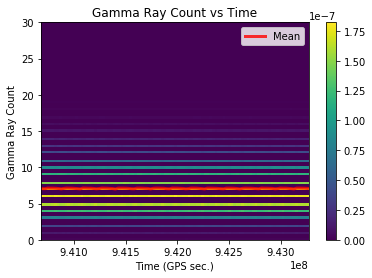

In [9]:
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(time, gammCount, bins=100, density=True);
#ax.set_aspect('equal', 'box')

bins = np.linspace(time.min(), time.max(), 100)
delta = bins[1]-bins[0]
idx = np.digitize(time,bins)
mean = [np.mean(gammCount[idx==k]) for k in range(100)]

ax.plot(bins-delta/2, mean, 'r-', lw=3, alpha=.8, label='Mean')
ax.axis('tight')
plt.title('Gamma Ray Count vs Time')
plt.xlabel('Time (GPS sec.)')
plt.ylabel('Gamma Ray Count')
plt.legend()
plt.colorbar(h[3], ax=ax)

The 'gamma-ray count vs time' graph shows a similar plot as the 'gamma-ray count vs solar phase' graph. The counts stay constant over time, as we can see how the lines stay the same color. The mean line stays relatively flat and stays close to 7.

# Problem 2

### Part 1

In [10]:
hf = h5py.File('images.h5', 'r')
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [11]:
imagedata = np.array(hf.get('image1'))
imagedata.shape

(200, 200)

In [12]:
stackdata = np.array(hf.get('imagestack'))
stackdata.shape

(200, 200, 10)

Text(0, 0.5, 'Count')

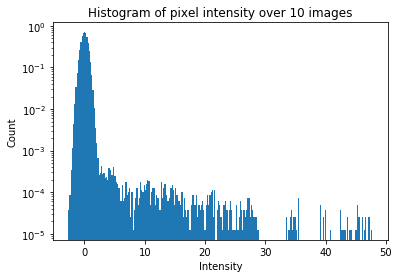

In [13]:
dataPoints = stackdata.flatten()

fig = plt.figure()
plt.hist(dataPoints, bins=250, density=True)

x = np.linspace(-2, 50, 1000)
gauss = stats.norm.pdf(x, 0, 0.5)

#plt.plot(x, gauss)

plt.yscale('log')
plt.title('Histogram of pixel intensity over 10 images')
plt.xlabel('Intensity')
plt.ylabel('Count')

Part 2

The above graph represents the counts for the intensity of 'light' found in each of the 10 images. We can see towards zero, the histogram has a Gaussian shape, as there is a parabola with a logarithmic scale. And there seems to be a tail to the right of the parabola, as well as 'bits and pieces' of data points towards the intensities of 40~50.

In this case, we would take the background pdf() to be a Gaussian distribution, with a mean of 0. However, we would have to plug and chug to see what scale/standard deviation would make the Gaussian distribution fit best with the hump to the left.

After this, we loop through the datapoints we have from the 10 images, and remove signal that would fit outside of 5-sigma of our background distribution. The filtered datapoints represents the signal recieved from the background. Datapoints outside of our background distribution is signal from a source. From the plot above, we can clearly see the 'faint' directly to the right of the background signal.